# Introduction

This dataset consists data of more than 500 of real products with their identification number listed in the Nykaa marketplace specifically from the region India. My objective is to clean and prepare the data due to the raw data being very unorganized. I will then move on to finding insights about the data and try to elaborate in the form of visualization.

In [114]:
#Importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import seaborn as sns

https://www.kaggle.com/datasets/susant4learning/nykaacosmeticsproductsreview2021/code

In [116]:
#defining file path
file_path = '/Users/kalyani/Documents/Kalyani_Courses/Data science/Nykaa_Product_Review.csv'

In [117]:
df = pd.read_csv('/Users/kalyani/Documents/Kalyani_Courses/Data science/Nykaa_Product_Review.csv')

# DATA CLEANING & PREPARATION

In [96]:
# check the number of rows and columns
df.shape

(625, 18)

In [97]:
#Checking out First Few Rows

df.head()

,Product Id,Product Brand Code,Retailer,Product Category,Product Brand,Product Name,Product Price,Product Url,Market,Product Description,Product Currency,Product Image Url,Product Tags,Product Contents,Product Rating,Product Reviews Count,Expected Category Count,Expected Brand Count
0,b77f3da33be6e65f6183da6ada8c07ca,BZ1000,nykaa.com,Makeup > Face > Contour,ETUDE HOUSE,ETUDE HOUSE Face Color Shading - 02,600,https://www.nykaa.com/c/p/760922?skuId=760920,IN,Etude House Face Color Shading provides a shad...,INR,https://images-static.nykaa.com/media/catalog/...,"ETUDE HOUSE Face Color Shading - 02, Makeup, F...",NaN,4.6,4.0,153,82
1,f54658c5d511195b6621a640fb743b1b,BH5931,nykaa.com,Brand > L'Oreal Paris,L'Oreal Paris,L'Oreal Paris Glow Mon Amour Highlighting Drop...,454,https://www.nykaa.com/c/p/565974?skuId=565973,IN,It's time to skip the snooze button and get up...,INR,https://images-static.nykaa.com/media/catalog/...,L'Oreal Paris Glow Mon Amour Highlighting Drop...,"G927637, Cyclopentasiloxane, Dimethicone, Isod...",4.3,147.0,431,431
2,cdf6b3387f8976c8e38ad150173dbb6d,BH7276,nykaa.com,Makeup > Face > Foundation,The Body Shop,The Body Shop All-In-One Face Base - 045,1395,https://www.nykaa.com/c/p/31142?skuId=30050,IN,Note: The Body Shop products will be dispatche...,INR,https://images-static.nykaa.com/media/catalog/...,"The Body Shop All-In-One Face Base - 045 , Mak...",NaN,4.4,58.0,0,0
3,424755c11c78b2b24ff13c675baf5d19,BZ1000,nykaa.com,Health & Wellness > Good for You > Super Food,True Elements,True Elements Sunflower Raw Seeds,175,https://www.nykaa.com/c/p/370883?skuId=370881,IN,Sunflower has always been admired for its beau...,INR,https://images-static.nykaa.com/media/catalog/...,"True Elements Sunflower Raw Seeds, Wellness, S...",Raw Sunflower Seeds,5,0.0,389,149
4,f7f76573099db0058ef5264c35d9d02e,BZ1000,nykaa.com,Makeup > Lips > Lip Stain,Nykaa Cosmetics,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...,539,https://www.nykaa.com/c/p/555315?skuId=555310,IN,It's no secret that a good lippie is a real mo...,INR,https://images-static.nykaa.com/media/catalog/...,NykaaÂ Wonderpuff!Â LipÂ &Â CheekÂ Cushion Lip...,NaN,4,934.0,80,436


In [98]:
#Checking Column Names

df.columns

Index(['Product Id', 'Product Brand Code', 'Retailer', 'Product Category',
       'Product Brand', 'Product Name', 'Product Price', 'Product Url',
       'Market', 'Product Description', 'Product Currency',
       'Product Image Url', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Expected Category Count',
       'Expected Brand Count'],
      dtype='object')

In [99]:
#Checking Data Types for each Column

df.dtypes

Product Id                  object
Product Brand Code          object
Retailer                    object
Product Category            object
Product Brand               object
Product Name                object
Product Price               object
Product Url                 object
Market                      object
Product Description         object
Product Currency            object
Product Image Url           object
Product Tags                object
Product Contents            object
Product Rating              object
Product Reviews Count      float64
Expected Category Count     object
Expected Brand Count         int64
dtype: object

In [100]:
# Identify columns with missing values and count the missing values
columns_with_missing = df.columns[df.isnull().any()]
missing_count = df[columns_with_missing].isnull().sum()

print("Columns with missing values:")
print(missing_count)

Columns with missing values:
Product Category          81
Product Url               15
Product Tags              15
Product Contents         301
Product Rating            69
Product Reviews Count     62
dtype: int64


In [101]:
# Handling missing values in specific columns

# For instance, filling missing values in 'Product Tags' with a default value 'No Tags'
df['Product Tags'].fillna('No Tags', inplace=True)

# Impute missing values in 'Product Reviews Count' with mean or median
mean_reviews_count = df['Product Reviews Count'].mean()
df['Product Reviews Count'].fillna(mean_reviews_count, inplace=True)


In [102]:
# Check data types of columns
print(df.dtypes)

# Convert 'Product Price' to numeric if it's stored as a string
df['Product Price'] = pd.to_numeric(df['Product Price'], errors='coerce')

# Convert 'Product Rating' to float if it's stored as a string
df['Product Rating'] = pd.to_numeric(df['Product Rating'], errors='coerce')


Product Id                  object
Product Brand Code          object
Retailer                    object
Product Category            object
Product Brand               object
Product Name                object
Product Price               object
Product Url                 object
Market                      object
Product Description         object
Product Currency            object
Product Image Url           object
Product Tags                object
Product Contents            object
Product Rating              object
Product Reviews Count      float64
Expected Category Count     object
Expected Brand Count         int64
dtype: object


In [103]:
# Check for duplicates based on 'Product Id'
duplicate_rows = df[df.duplicated(subset=['Product Id'], keep=False)]

# Remove duplicates, keeping the first occurrence
df.drop_duplicates(subset=['Product Id'], keep='first', inplace=True)


In [104]:
# Splitting the 'Product Category' column with delimiter'>'
split_categories = df['Product Category'].str.split('>', n=2, expand=True)

# Keep only the first two values and discard the rest
df['Main Category'] = split_categories[0]
df['Sub Category'] = split_categories[1]

# Displaying the updated DataFrame with 'Main Category' and 'Sub Category'
print(df.head())

                         Product Id Product Brand Code   Retailer  \
0  b77f3da33be6e65f6183da6ada8c07ca             BZ1000  nykaa.com   
1  f54658c5d511195b6621a640fb743b1b             BH5931  nykaa.com   
2  cdf6b3387f8976c8e38ad150173dbb6d             BH7276  nykaa.com   
3  424755c11c78b2b24ff13c675baf5d19             BZ1000  nykaa.com   
4  f7f76573099db0058ef5264c35d9d02e             BZ1000  nykaa.com   

                                Product Category    Product Brand  \
0                        Makeup > Face > Contour      ETUDE HOUSE   
1                          Brand > L'Oreal Paris    L'Oreal Paris   
2                     Makeup > Face > Foundation    The Body Shop   
3  Health & Wellness > Good for You > Super Food    True Elements   
4                      Makeup > Lips > Lip Stain  Nykaa Cosmetics   

                                        Product Name  Product Price  \
0                ETUDE HOUSE Face Color Shading - 02          600.0   
1  L'Oreal Paris Glow Mon Am

In [105]:
# Check data types of columns
print(df.dtypes)

Product Id                  object
Product Brand Code          object
Retailer                    object
Product Category            object
Product Brand               object
Product Name                object
Product Price              float64
Product Url                 object
Market                      object
Product Description         object
Product Currency            object
Product Image Url           object
Product Tags                object
Product Contents            object
Product Rating             float64
Product Reviews Count      float64
Expected Category Count     object
Expected Brand Count         int64
Main Category               object
Sub Category                object
dtype: object


# Data Analysis

# Product Category

<span style="color:red"> What are the the top 10 Sub-categories with the Most Products</span>

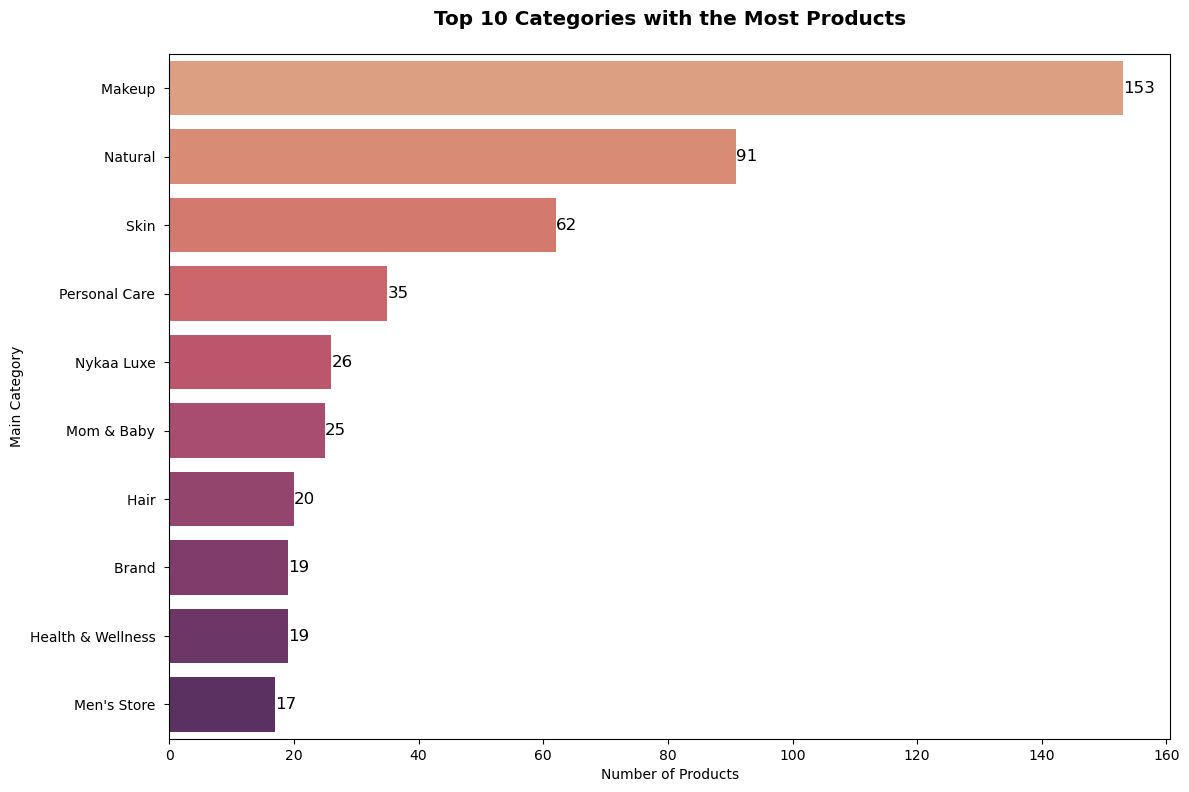

In [106]:
detailed_category_counts = df['Main Category'].value_counts()

# Creating a DataFrame from the Series
product_count_per_category = pd.DataFrame({'Main Category': detailed_category_counts.index, 'count': detailed_category_counts.values})

plt.figure(figsize=(12, 8))
ax = sns.barplot(x="count", y="Main Category", data=product_count_per_category.head(10), palette="flare")

# Formatting x-axis labels with a thousands comma separator
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Adding data labels to the bars
for index, value in enumerate(product_count_per_category["count"].head(10)):
    ax.text(value, index, f"{value:,.0f}", ha='left', va='center', color='black', fontsize=12)

ax.set_xlabel("Number of Products")
ax.set_ylabel("Main Category")
ax.set_title("Top 10 Categories with the Most Products", fontweight='heavy', size='x-large', y=1.03)

plt.tight_layout()
plt.show()


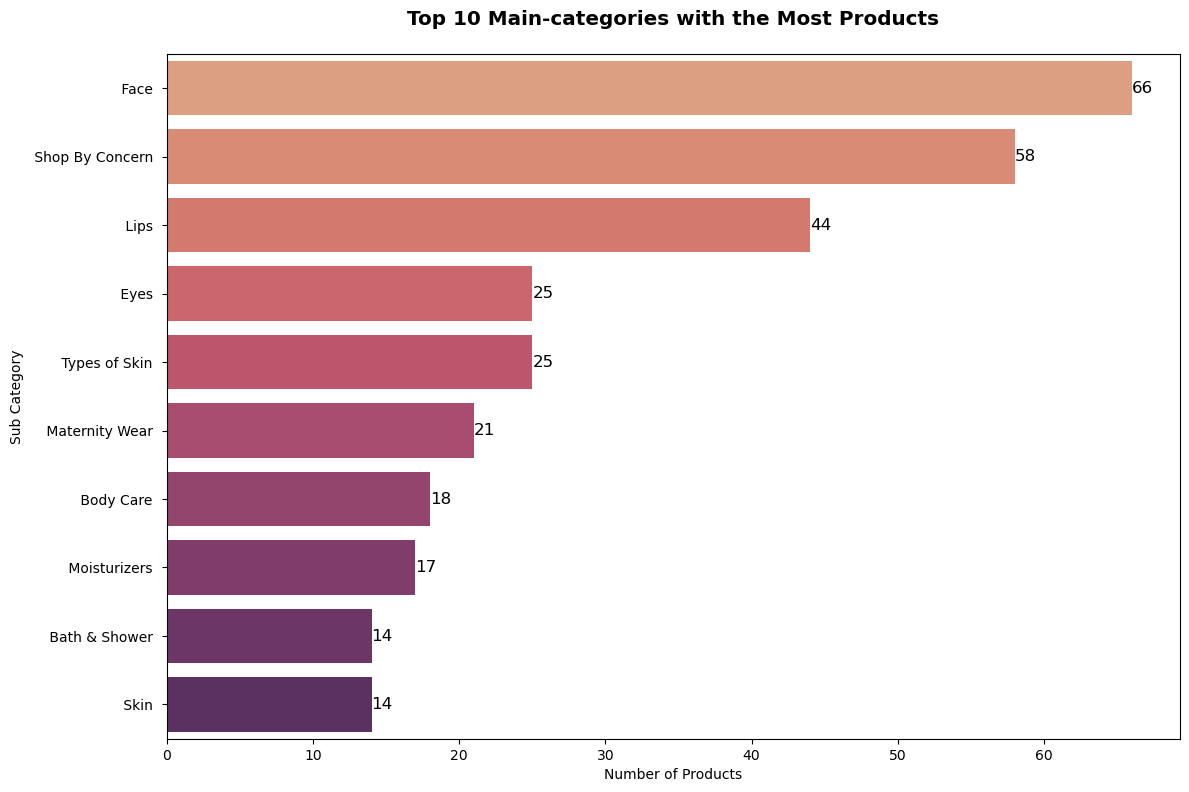

In [107]:

detailed_category_counts = df['Sub Category'].value_counts()

# Creating a DataFrame from the Series
product_count_per_category = pd.DataFrame({'Sub Category': detailed_category_counts.index, 'count': detailed_category_counts.values})

plt.figure(figsize=(12, 8))
ax = sns.barplot(x="count", y="Sub Category", data=product_count_per_category.head(10), palette="flare")


# Formatting x-axis labels with a thousands comma separator
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Adding data labels to the bars
for index, value in enumerate(product_count_per_category["count"].head(10)):
    ax.text(value, index, f"{value:,.0f}", ha='left', va='center', color='black', fontsize=12)

ax.set_xlabel("Number of Products")
ax.set_ylabel("Sub Category")
ax.set_title("Top 10 Main-categories with the Most Products", fontweight='heavy', size='x-large', y=1.03)

plt.tight_layout()
plt.show()



Makeup especially Face category covers most of the products in this dataset. 
In general, this dataset contains mostly products closely related to Makeup category.

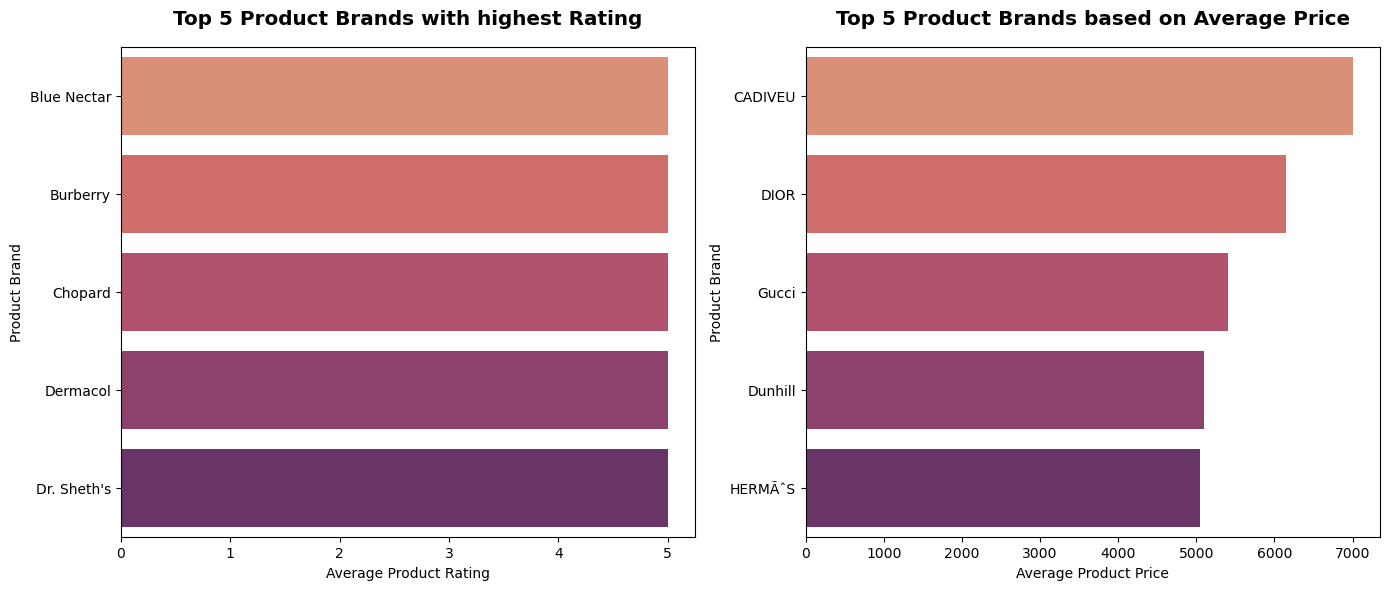

In [87]:
# Grouping by 'Product Brand' and calculating the mean of 'Product Rating' for each brand
avg_rating_per_brand = df.groupby('Product Brand')['Product Rating'].mean()

# Sorting the average ratings in descending order and selecting the top 5 brands by rating
top_5_brands_by_rating = avg_rating_per_brand.nlargest(5)

# Grouping by 'Product Brand' and calculating the mean of 'Product Price' for each brand
avg_price_per_brand = df.groupby('Product Brand')['Product Price'].mean()

# Sorting the average prices in descending order and selecting the top 5 brands by price
top_5_brands_by_price = avg_price_per_brand.nlargest(5)

# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the top 5 brands by rating using 'flare' palette
sns.barplot(x=top_5_brands_by_rating.values, y=top_5_brands_by_rating.index, ax=axes[0], palette='flare')
axes[0].set_xlabel('Average Product Rating')
axes[0].set_ylabel('Product Brand')
axes[0].set_title('Top 5 Product Brands with highest Rating', fontweight='heavy', size='x-large', y=1.03)

# Plotting the top 5 brands by price using 'flare' palette
sns.barplot(x=top_5_brands_by_price.values, y=top_5_brands_by_price.index, ax=axes[1], palette='flare')
axes[1].set_xlabel('Average Product Price')
axes[1].set_ylabel('Product Brand')
axes[1].set_title('Top 5 Product Brands based on Average Price', fontweight='heavy', size='x-large', y=1.03)

plt.tight_layout()
plt.show()


# Product Ratings and price


/var/folders/dj/7kt6051x2713pn1bzyvl86f40000gn/T/ipykernel_4988/949701804.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Product Rating'], bins=20, kde=True, palette='flare')


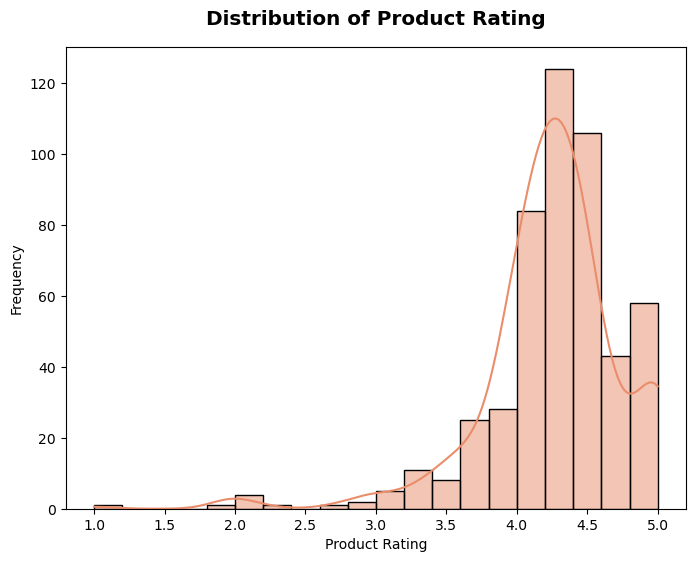

In [85]:
# Histogram for 'Product Rating'
plt.figure(figsize=(8, 6))
sns.histplot(df['Product Rating'], bins=20, kde=True, palette='flare')
plt.title('Distribution of Product Rating', fontweight='heavy', size='x-large', y=1.03)
plt.xlabel('Product Rating')
plt.ylabel('Frequency')
plt.show()

<span style="color:red"> Most of the product rating range around 4.0 - 4.5 with no products score of 1.5. The rating distribution is slightly left-skewed.</span>

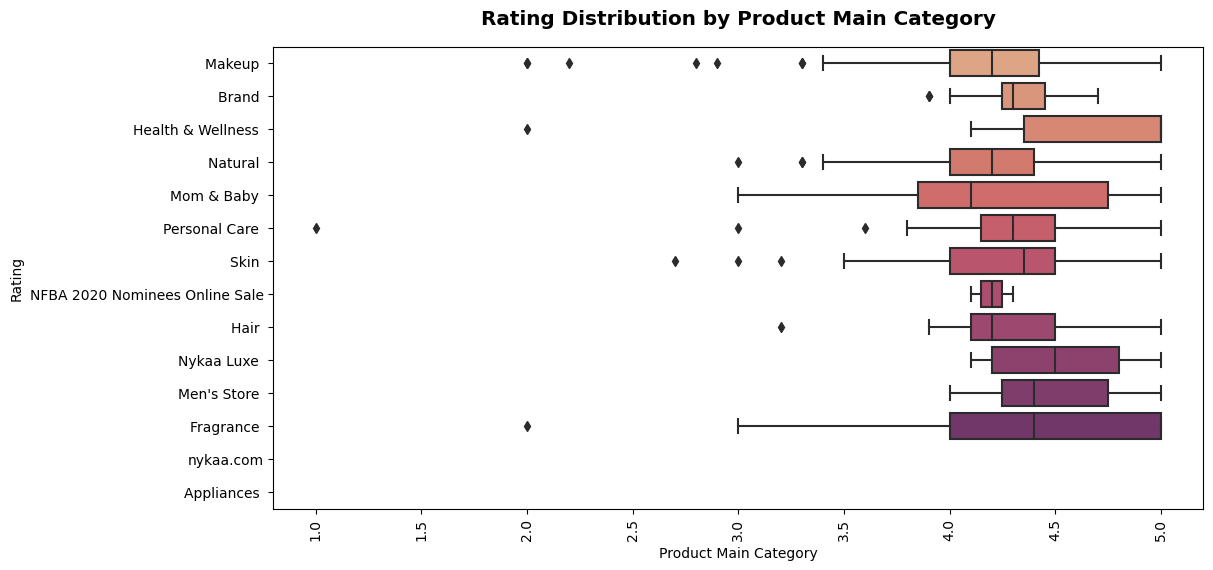

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product Rating', y='Main Category', palette='flare')
plt.title('Rating Distribution by Product Main Category', fontweight='heavy', size='x-large', y=1.03)
plt.xlabel('Product Main Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

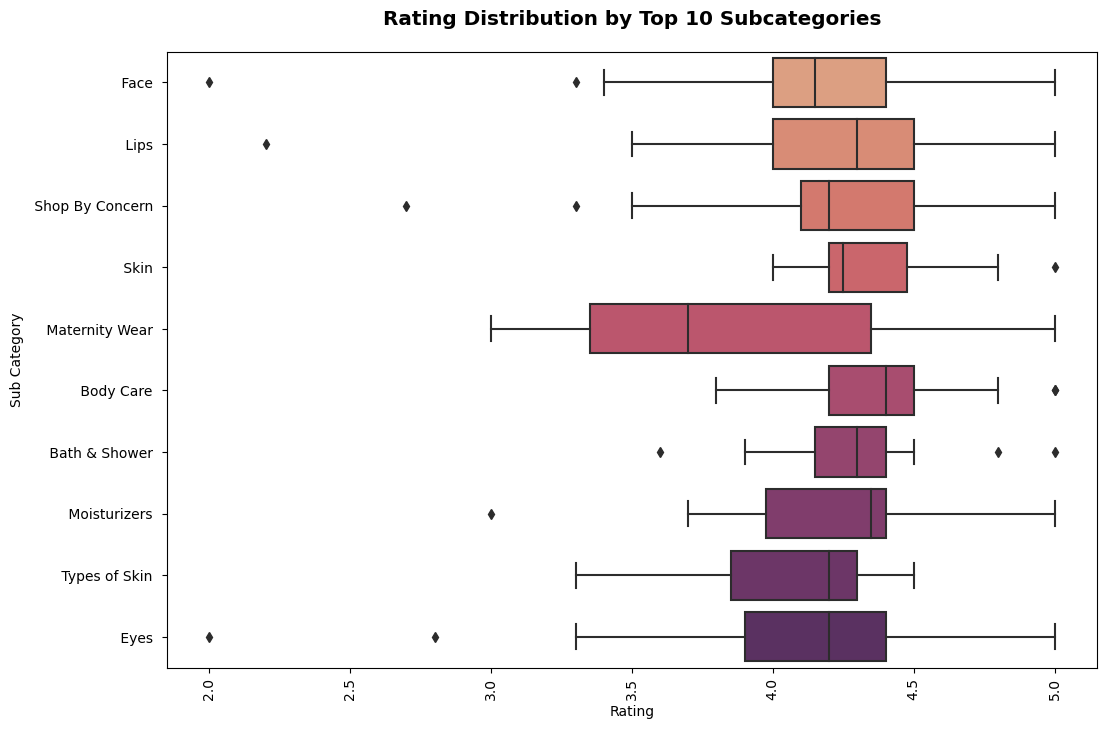

In [80]:
# Get the top 10 most frequent subcategories
top_10_subcategories = df['Sub Category'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top 10 subcategories
df_top_10_subcategories = df[df['Sub Category'].isin(top_10_subcategories)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_10_subcategories, x='Product Rating', y='Sub Category', palette='flare')
plt.title('Rating Distribution by Top 10 Subcategories', fontweight='heavy', size='x-large', y=1.03)
plt.xlabel('Rating')
plt.ylabel('Sub Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

<span style="color:red">In the Rating Distribution by Product Sub-Category graph, I have noticed that the lowest rated product comes from the Face & Eye.While most of the sub categories have high rating (5.0)except Product for types of skin</span>

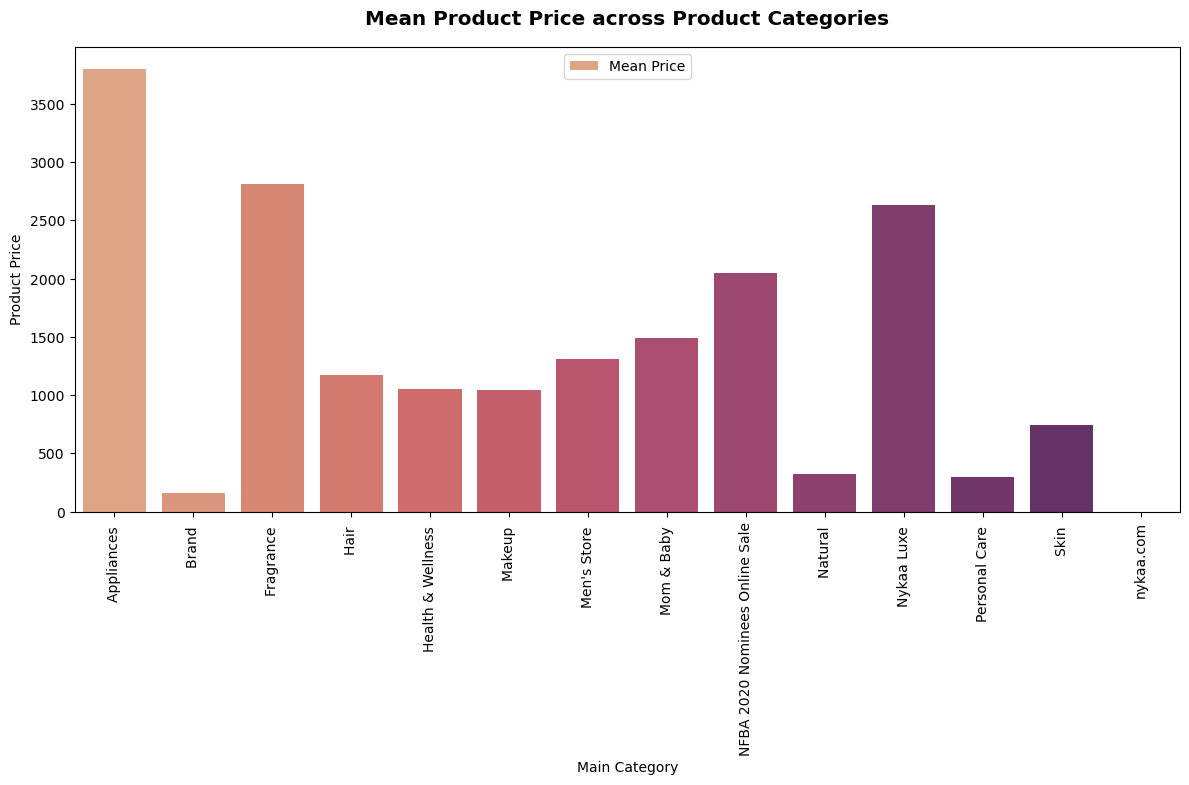

In [83]:
# Calculate mean price for each category
category_price_stats = df.groupby('Main Category')['Product Price'].agg(['mean', 'median']).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Main Category', y='mean', data=category_price_stats, palette='flare', label='Mean Price')
plt.xticks(rotation=90)
plt.xlabel('Main Category')
plt.ylabel('Product Price')
plt.title('Mean Product Price across Product Categories',fontweight='heavy', size='x-large', y=1.03)
plt.legend()
plt.tight_layout()
plt.show()

<span style="color:red"> Across all the products, Appliances has highest avg price followed by fragernce. </span>

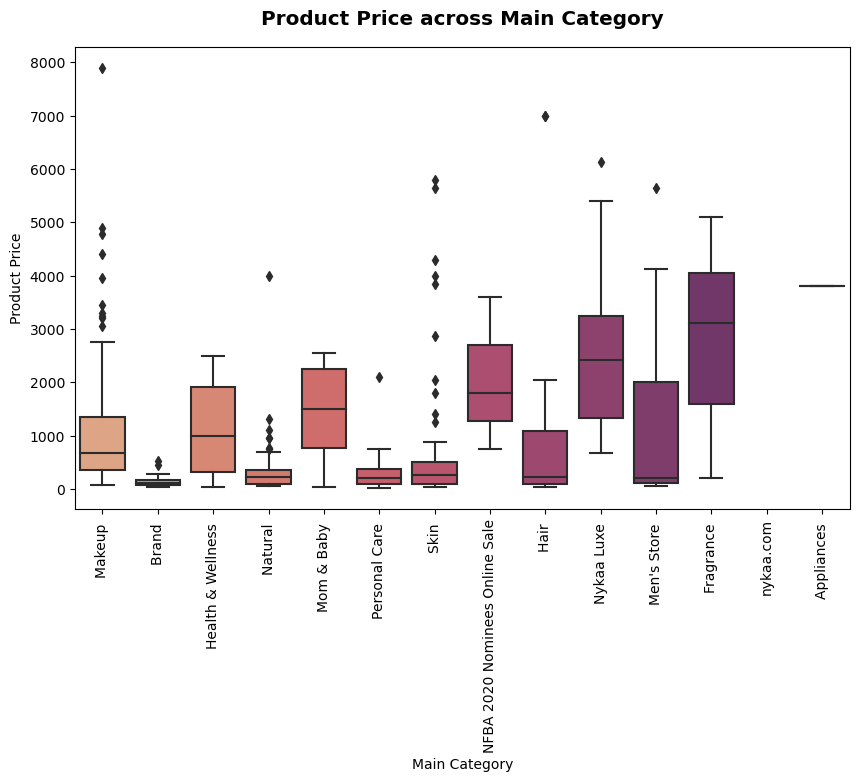

In [84]:
# Box plot of 'Product Price' across 'Product Category'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Main Category', y='Product Price', data=df, palette='flare')
plt.title('Product Price across Main Category', fontweight='heavy', size='x-large', y=1.03)
plt.xticks(rotation=90)
plt.xlabel('Main Category')
plt.ylabel('Product Price')
plt.show()

<span style="color:red"> Most of the product prices are between 0 to 4000. Noticeably, the Makeup & skin products have a really widespread Price.</span>